In [1]:
import matplotlib.pyplot as plt
import nibabel as nib 
import numpy as np 
import ipywidgets as ipyw
import glob
import subprocess as sub 
from subprocess import * 
import os 
from pathlib import Path
import pandas as pd

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


# After running alignment, want to ensure that they look ok. 

In [74]:
PATH = PATH = Path('/working/lupolab/julia/tcia_analysis/datasets/')

Here is a 3D Image viewer: 

In [75]:
class ImageSliceViewer3D:
    """ 
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed. 

    Argumentss:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('plasma'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(8,8), cmap='viridis'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.view_selection, view=ipyw.RadioButtons(
            options=['x-y','y-z', 'z-x'], value='x-y', 
            description='Slice plane selection:', disabled=False,
            style={'description_width': 'initial'}))
    
    def view_selection(self, view):
        # Transpose the volume to orient according to the slice plane selection
        orient = {"y-z":[1,2,0], "z-x":[2,0,1], "x-y": [0,1,2]}
        self.vol = np.transpose(self.volume, orient[view])
        maxZ = self.vol.shape[2] - 1
        
        # Call to view a slice within the selected slice plane
        ipyw.interact(self.plot_slice, 
            z=ipyw.IntSlider(min=0, max=maxZ, step=1, continuous_update=False, 
            description='Image Slice:'))
        
    def plot_slice(self, z):
        # Plot slice for the given plane and slice
        self.fig = plt.figure(figsize=self.figsize)
        plt.imshow(self.vol[:,:,z], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])

Reading in the final df from the previous ipynb: 

In [76]:
df = pd.read_csv(Path(PATH, 'one_exam_per_patient_with_fixed_vol.csv'))

In [77]:
df = df.reset_index(drop = True)

### Patient TCGA-06-0240

In [78]:
df.patient_id.unique()[0]

'TCGA-06-0240'

In [79]:
df.loc[df.patient_id == df.patient_id.unique()[0]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
0,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,9-AxT1-thin_for_surgery-27598,1,T1C,ax,1,6-AXIAL_T1-20532
1,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,21-nordicICE_HFH_-_rBF_map_-Leakage_corrected-...,1,rBF,cor,1,6-AXIAL_T1-20532
2,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,1-3_PLANE_LOC-22369,0,SCOUT,NaN,1,6-AXIAL_T1-20532
3,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,5-AXIAL_DIFFUSION-62807,0,DWI,ax,1,6-AXIAL_T1-20532
4,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,8-AXIAL_PERFUSION-44568,1,PERFUSION,ax,1,6-AXIAL_T1-20532
5,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,4-AxFLAIR-thin_for_surgery-47036,0,T2_FLAIR,ax,1,6-AXIAL_T1-20532
6,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,10-COR_T1-52396,1,T1C,cor,1,6-AXIAL_T1-20532
7,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,6-AXIAL_T1-20532,0,T1,ax,1,6-AXIAL_T1-20532
8,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,2-SAG_T1-00985,0,T1,sag,1,6-AXIAL_T1-20532
9,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,22-nordicICE_HFH_-_MTT_map_-Leakage_corrected-...,1,MTT,cor,1,6-AXIAL_T1-20532


In [80]:
idx = 0
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [81]:
t1c = nib.load(Path(exam_path, row['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[5]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[7]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[10]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[10]['image']+'.nii.gz'))

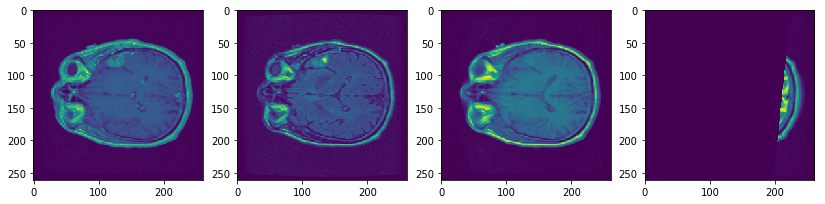

In [82]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1c, fla, t1, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,195//2])

In [83]:
ImageSliceViewer3D(np.asanyarray(fse.dataobj))

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

# --------------------------------------------------------------------------------------------------------------------

### Patient 'TCGA-06-0143'

In [84]:
df.patient_id.unique()[1]

'TCGA-06-0143'

In [85]:
df.loc[df.patient_id == df.patient_id.unique()[1]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
14,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,22-nordicICE_HFH_-_MTT_map_-Leakage_corrected-...,1,MTT,cor,1,8-AX_T1_pre_gd-27400
15,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,20-nordicICE_HFH_-_rBV_map_-Leakage_corrected-...,1,rBV,cor,1,8-AX_T1_pre_gd-27400
16,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,5-AXIAL_DIFFUSION-31199,0,DWI,ax,1,8-AX_T1_pre_gd-27400
17,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,3-SAG_T1_FLAIR-70783,0,T1,sag,1,8-AX_T1_pre_gd-27400
18,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,700-DTI_ASSET-98415,0,DTI,NaN,1,8-AX_T1_pre_gd-27400
19,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,701-DTI_ASSET-60937,0,DTI,NaN,1,8-AX_T1_pre_gd-27400
20,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,11-COR__T1_POST_GD_FLAIR-28783,1,T1C,cor,1,8-AX_T1_pre_gd-27400
21,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,4-AX_T2_FR-FSE_RF2_150-95140,0,T2,ax,1,8-AX_T1_pre_gd-27400
22,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,1-3_PLANE_LOC-11670,0,SCOUT,NaN,1,8-AX_T1_pre_gd-27400
23,TCGA-06-0143,TCGA-GBM,02-11-2005-83875,8-AX_T1_pre_gd-27400,0,T1,ax,1,8-AX_T1_pre_gd-27400


In [86]:
idx = 14
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [87]:
t1c = nib.load(Path(exam_path, df.iloc[28]['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[29]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[23]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[21]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[21]['image']+'.nii.gz'))

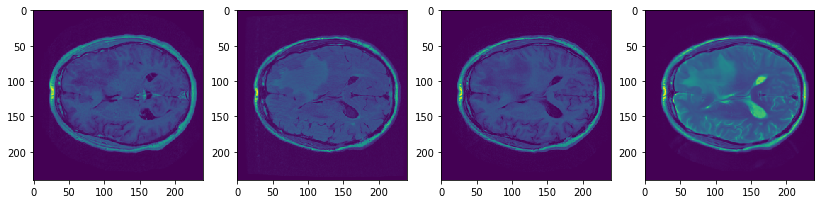

In [88]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1c, fla, t1, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

# --------------------------------------------------------------------------------------------------------------------

### Patient 'TCGA-19-0955'

In [89]:
df.patient_id.unique()[3]

'TCGA-19-0955'

In [90]:
df.loc[df.patient_id == df.patient_id.unique()[3]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
48,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,8-MRHG_T1_AX_POST_GAD-01973,1,T1C,ax,1,5-MRHG_T1_AX-92222
49,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,6-MRHG_DIFF-35092,0,DWI,NaN,1,5-MRHG_T1_AX-92222
50,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,1-MRHG_SCOUT-65759,0,SCOUT,NaN,1,5-MRHG_T1_AX-92222
51,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,9-MRHG_T1_COR_POST_GAD-25509,1,T1C,cor,1,5-MRHG_T1_AX-92222
52,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,10-MP_RAGE_AXIAL-63638,1,T1C,ax,1,5-MRHG_T1_AX-92222
53,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,6-MRHG_DIFF-41372,0,DWI,NaN,1,5-MRHG_T1_AX-92222
54,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,12-MRHG_T1_COR_POST_GAD-59603,1,T1C,cor,1,5-MRHG_T1_AX-92222
55,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,5-MRHG_T1_AX-92222,0,T1,ax,1,5-MRHG_T1_AX-92222
56,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,3-MRHG_FLAIR_AX-38966,0,T2_FLAIR,ax,1,5-MRHG_T1_AX-92222
57,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151,9-MRHG_FLAIR_AX-56466,0,T2_FLAIR,ax,1,5-MRHG_T1_AX-92222


In [91]:
idx = 48
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [92]:
t1c = nib.load(Path(exam_path, df.iloc[48]['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[56]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[63]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[70]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[70]['image']+'.nii.gz'))

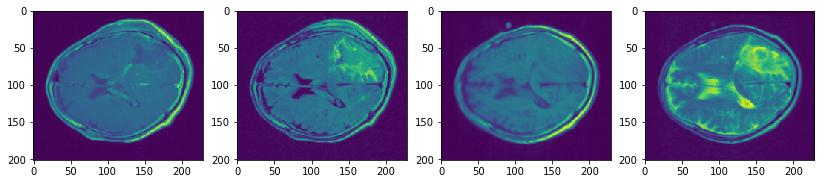

In [93]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1c, fla, t1, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

In [94]:
ImageSliceViewer3D(np.asanyarray(fse.dataobj))

interactive(children=(RadioButtons(description='Slice plane selection:', options=('x-y', 'y-z', 'z-x'), style=…

# --------------------------------------------------------------------------------------------------------------------

### Patient TCGA-06-0648

In [121]:
df.patient_id.unique()[4]

'TCGA-06-0648'

In [122]:
df.loc[df.patient_id == df.patient_id.unique()[4]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
71,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,20-nordicICE_HFH_-_rBV_map_-Leakage_corrected-...,1,rBV,cor,1,9-AX_T1_pre_gd-49929
72,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,11-AX_T1_POST_GD_FLAIR-02197,1,T1C,ax,1,9-AX_T1_pre_gd-49929
73,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,3-SAG_T1_FLAIR-88539,0,T1,sag,1,9-AX_T1_pre_gd-49929
74,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,6-AXIAL_FLAIR-80030,0,T2_FLAIR,ax,1,9-AX_T1_pre_gd-49929
75,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,9-AX_T1_pre_gd-49929,0,T1,ax,1,9-AX_T1_pre_gd-49929
76,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,10-AXIAL_PERFUSION-23835,1,PERFUSION,ax,1,9-AX_T1_pre_gd-49929
77,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,diffusion_b=,0,DWI,NaN,1,9-AX_T1_pre_gd-49929
78,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,802-DTI_ASSET-80966,0,DTI,NaN,1,9-AX_T1_pre_gd-49929
79,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,8-DTI_ASSET-79144,0,DTI,NaN,1,9-AX_T1_pre_gd-49929
80,TCGA-06-0648,TCGA-GBM,01-20-2006-51419,2-ASSET_cal-36729,0,SCOUT,NaN,1,9-AX_T1_pre_gd-49929


In [123]:
idx = 71
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [126]:
t1ca = nib.load(Path(exam_path, df.iloc[72]['image']+'a.nii.gz'))
t1c = nib.load(Path(exam_path, df.iloc[72]['image']+'.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[74]['image']+'a.nii.gz'))
fl  = nib.load(Path(exam_path, df.iloc[74]['image']+'.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[75]['image']+'a.nii.gz'))
t1a = nib.load(Path(exam_path, df.iloc[75]['image']+'.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[83]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[83]['image']+'.nii.gz'))

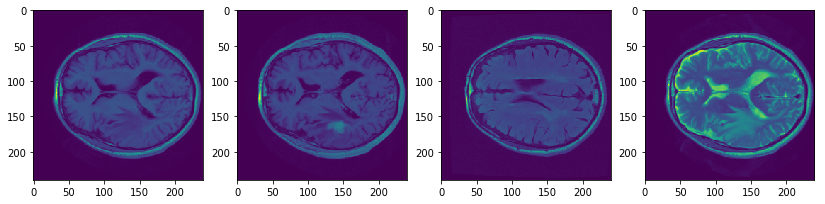

In [127]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1a, t1ca, fla, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

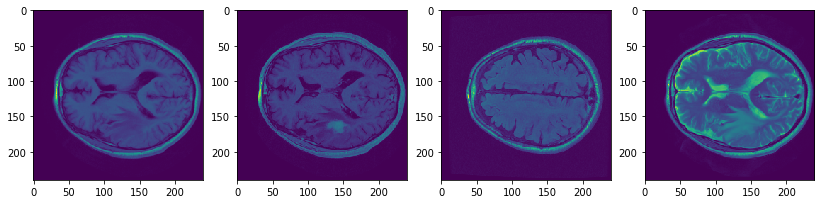

In [128]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1, t1c, fl, fse]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

In [129]:
fl.shape 

(240, 240, 135)

In [130]:
t1.shape

(240, 240, 180)

# --------------------------------------------------------------------------------------------------------------------

### Patient TCGA-12-0829

In [101]:
df.patient_id.unique()[5]

'TCGA-12-0829'

In [102]:
df.loc[df.patient_id == df.patient_id.unique()[5]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
89,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,4-FLAIR-82367,0,T2_FLAIR,NaN,1,5-T1_AX_PRE-23096
90,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,18-T1_AX_POST-73832,1,T1C,ax,1,5-T1_AX_PRE-23096
91,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,7-ep2ddiff3scantraceADC-46169,0,ADC,NaN,1,5-T1_AX_PRE-23096
92,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,2-T1_SE_SAG-47686,0,T1,sag,1,5-T1_AX_PRE-23096
93,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,19-T1_COR_POST-83017,1,T1C,cor,1,5-T1_AX_PRE-23096
94,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,3-T2_TSE_AX-41475,0,T2,ax,1,5-T1_AX_PRE-23096
95,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,5-T1_AX_PRE-23096,0,T1,ax,1,5-T1_AX_PRE-23096
96,TCGA-12-0829,TCGA-GBM,06-02-1999-BRAIN-09460,6-ep2ddiff3scantrace-59892,0,DWI,NaN,1,5-T1_AX_PRE-23096


In [103]:
idx = 89
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [104]:
t1c = nib.load(Path(exam_path, df.iloc[90]['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[89]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[95]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[94]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[94]['image']+'.nii.gz'))

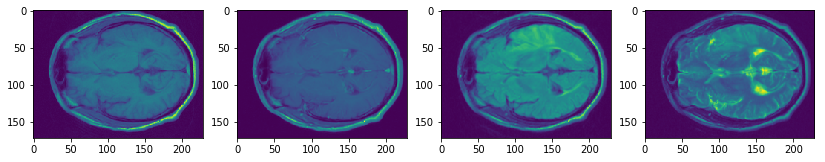

In [105]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1, t1c, fla, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

### Patient TCGA-DU-7309

In [106]:
df.patient_id.unique()[-1]

'TCGA-DU-7309'

In [107]:
df.loc[df.patient_id == df.patient_id.unique()[-1]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
3534,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,4-AX_T2_FR-FSE_RF2_150-79703,0,T2,ax,1,10-AX_T1_pre_gd-82760
3535,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,7-AXIAL_DIFFUSION-02078,0,DWI,ax,1,10-AX_T1_pre_gd-82760
3536,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,6-AXIAL_FLAIR-44187,0,T2_FLAIR,ax,1,10-AX_T1_pre_gd-82760
3537,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,12-AX_T1_POST_GD_FLAIR-75778,1,T1C,ax,1,10-AX_T1_pre_gd-82760
3538,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,13-COR__T1_POST_GD_FLAIR-63305,1,T1C,cor,1,10-AX_T1_pre_gd-82760
3539,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,9-3D_DCE_T1_MAP-28590,0,T1,NaN,1,10-AX_T1_pre_gd-82760
3540,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,5-DTI_2.6mm_WH-71175,0,DTI,NaN,1,10-AX_T1_pre_gd-82760
3541,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,502-DTI_2.6mm_WH-46208,0,DTI,NaN,1,10-AX_T1_pre_gd-82760
3542,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,501-DTI_2.6mm_WH-08666,0,DTI,NaN,1,10-AX_T1_pre_gd-82760
3543,TCGA-DU-7309,TCGA-LGG,08-31-1996-MRI_BRAIN_WWO_CONTRAST-83234,3-SAG_T1_FLAIR-00455,0,T1,sag,1,10-AX_T1_pre_gd-82760


In [109]:
idx = 3534
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [110]:
t1c = nib.load(Path(exam_path, df.iloc[3537]['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[3536]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[3547]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[3534]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[3534]['image']+'.nii.gz'))

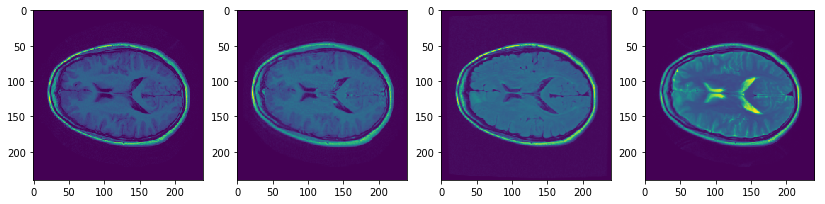

In [111]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1, t1c, fla, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])

### Patient TCGA-DU-A6S6

In [112]:
df.patient_id.unique()[-2]

'TCGA-DU-A6S6'

In [113]:
df.loc[df.patient_id == df.patient_id.unique()[-2]]

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
3522,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,9-COR_T1_POST_GD-46070,1,T1C,cor,1,6-AXIAL_T1-35458
3523,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,500-Average_DC-80555,0,ADC,NaN,1,6-AXIAL_T1-35458
3524,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,2-SAG_T1-38798,0,T1,sag,1,6-AXIAL_T1-35458
3525,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,8-Ax_T1_2.5mm_for_surgery-94258,1,T1C,ax,1,6-AXIAL_T1-35458
3526,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,501-Fractional_Ansio.-73776,0,FA,NaN,1,6-AXIAL_T1-35458
3527,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,5-AXIAL_DTI-43744,0,DTI,ax,1,6-AXIAL_T1-35458
3528,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,7-AXIAL_PERFUSION-54915,1,PERFUSION,ax,1,6-AXIAL_T1-35458
3529,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,3-AXIAL_FSE-52767,0,T2,ax,1,6-AXIAL_T1-35458
3530,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,1-3_PLANE_LOC-57443,0,SCOUT,NaN,1,6-AXIAL_T1-35458
3531,TCGA-DU-A6S6,TCGA-LGG,05-21-1992-MRI_BRAIN_WWO_CONTRAST-42529,502-T2-weighted_trace-08684,0,T2,NaN,1,6-AXIAL_T1-35458


In [117]:
idx = 3522
row = df.iloc[idx]
exam_path = Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'])

In [119]:
t1c = nib.load(Path(exam_path, df.iloc[3525]['image']+'a.nii.gz'))
fla = nib.load(Path(exam_path, df.iloc[3533]['image']+'a.nii.gz'))
t1  = nib.load(Path(exam_path, df.iloc[3532]['image']+'a.nii.gz'))
fsea = nib.load(Path(exam_path, df.iloc[3531]['image']+'a.nii.gz'))
fse = nib.load(Path(exam_path, df.iloc[3531]['image']+'.nii.gz'))

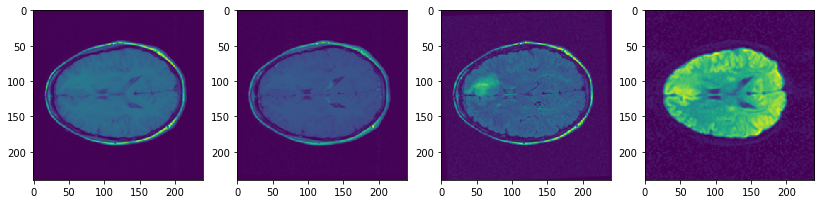

In [120]:
columns = 4
plt.figure(figsize = (14, 14))
for i, image in enumerate([t1, t1c, fla, fsea]): 
    plt.subplot(4 / columns+1, columns, i+1)
    plt.imshow(np.array(image.dataobj)[:,:,t1c.shape[2]//2])